In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
df = sns.load_dataset("titanic")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [35]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived'>

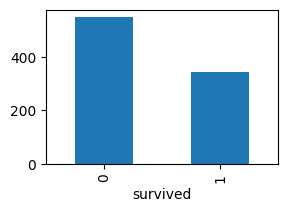

In [36]:
plt.figure(figsize=(3,2))
df['survived'].value_counts().plot(kind='bar')

In [37]:
df.groupby(['survived', 'sex'])['survived'].size()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

In [38]:
df.groupby(['survived', 'adult_male'])['survived'].size()

survived  adult_male
0         False         100
          True          449
1         False         254
          True           88
Name: survived, dtype: int64

In [39]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
df = df.drop(['deck', 'alive', 'embark_town'], axis=1)

In [41]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,False


In [42]:
df['age'] = df['age'].fillna(df['age'].mean())

In [43]:
df = df.dropna()

In [44]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [45]:
df.shape

(889, 12)

In [46]:
x = df.drop(['survived'], axis=1)
y = df['survived']

In [47]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [48]:
mms = MinMaxScaler()
le = LabelEncoder()

In [51]:
for col in x.columns:
    #print(col)
    if is_numeric_dtype(x[col]):
        x[col] = mms.fit_transform(x[[col]])
    else:
        x[col] = le.fit_transform(x[col])

In [52]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,1.0,1,0.318182,0.166667,0.0,0.073171,2,2,1,1.0,0.0
1,0.0,0,0.590909,0.166667,0.0,0.841463,0,0,2,0.0,0.0
2,1.0,0,0.386364,0.000000,0.0,0.166667,2,2,2,0.0,1.0
3,0.0,0,0.545455,0.166667,0.0,0.768293,2,0,2,0.0,0.0
4,1.0,1,0.545455,0.000000,0.0,0.174797,2,2,1,1.0,1.0


In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [56]:
knnc = KNeighborsClassifier()

In [58]:
model = knnc.fit(xtrain, ytrain)

In [59]:
model.score(xtrain, ytrain)

0.8649789029535865

In [60]:
model.score(xtest, ytest)

0.7752808988764045

In [62]:
#prediction
pred = model.predict(xtest)

In [64]:
#confusion matrix
cm = confusion_matrix(ytest, pred)

In [65]:
cm

array([[86, 23],
       [17, 52]])

<Axes: >

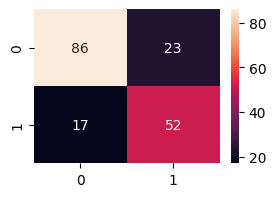

In [67]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True)